## **Heart Failure Prediction** -- Chest Pain Analysis





## Data Preprocessing

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
# import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
#  Import and read the heart.csv.
heart = pd.read_csv("data.csv")
heart
#Replacing strings with numbers
gender = {'M': 1,'F': 0}
heart.Sex = [gender[item] for item in heart.Sex]

ex_angina={'N': 0,'Y': 1}
heart.ExerciseAngina = [ex_angina[item] for item in heart.ExerciseAngina]

chest_pain={'ATA': 0,'NAP': 1, 'ASY': 2, 'TA':3 }
heart.ChestPainType = [chest_pain[item] for item in heart.ChestPainType]

rest_ecg={'LVH': 0,'Normal': 1, 'ST': 2 }
heart.RestingECG = [rest_ecg[item] for item in heart.RestingECG]
heart

st_slope={'Down': 0,'Flat': 1, 'Up': 2 }
heart.	ST_Slope = [st_slope[item] for item in heart.ST_Slope]
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,0,0.0,2,0
1,49,0,1,160,180,0,1,156,0,1.0,1,1
2,37,1,0,130,283,0,2,98,0,0.0,2,0
3,48,0,2,138,214,0,1,108,1,1.5,1,1
4,54,1,1,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,2,144,193,1,1,141,0,3.4,1,1
915,57,1,2,130,131,0,1,115,1,1.2,1,1
916,57,0,0,130,236,0,0,174,0,0.0,1,1


In [38]:
# Our data has 3 types of data:
# Continuous (#): which is quantitative data that can be measured -- RestingBP, Cholesterol, MaxHR
# Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc) ChestPain, StSlope
# Binary Data: data whose unit can take on only two possible states ( 0 &1 ). ExerciseAngina, HeartDisease

In [11]:
# heart.dtypes
print("(Rows, columns): " + str(heart.shape))
heart.columns

(Rows, columns): (918, 12)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
heart.nunique(axis=0)# returns the number of unique values for each variable.

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [13]:
# Check the total missing values in each column. A field with a NULL value is the one that has been left blank during the record creation.
print("Total NULL Values in each columns")
print("*********************************")
print(heart.isnull().sum())

Total NULL Values in each columns
*********************************
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [14]:
#Display statistical description of the features/ #summarize the count, mean, 
#standard deviation, min, and max for numeric variables.
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.452070,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [15]:
#styled describe
heart.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Sex,918.000000,0.789760,0.407701,0.000000,1.000000,1.000000,1.000000,1.000000
ChestPainType,918.000000,1.452070,0.851832,0.000000,1.000000,2.000000,2.000000,3.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
RestingECG,918.000000,0.989107,0.631671,0.000000,1.000000,1.000000,1.000000,2.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [16]:
#cleaning the dataset by removing all zeroes in the column "cholesterol" as there is no 0 cholesterole.
clean_df=heart[heart['Cholesterol'] !=0]
clean_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,0,0.0,2,0
1,49,0,1,160,180,0,1,156,0,1.0,1,1
2,37,1,0,130,283,0,2,98,0,0.0,2,0


In [17]:
#Lets see if theirs a good proportion between our positive & negative binary predictor.
# There were 390 patients with < 50% diameter narrowing of arteries, 
#and 356 patients with  > 50% diameter narrowing of arteries 
#[ 1 = heart disease, 0 - no heart disease]
clean_df['HeartDisease'].value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

## Exploratory Data Analysis

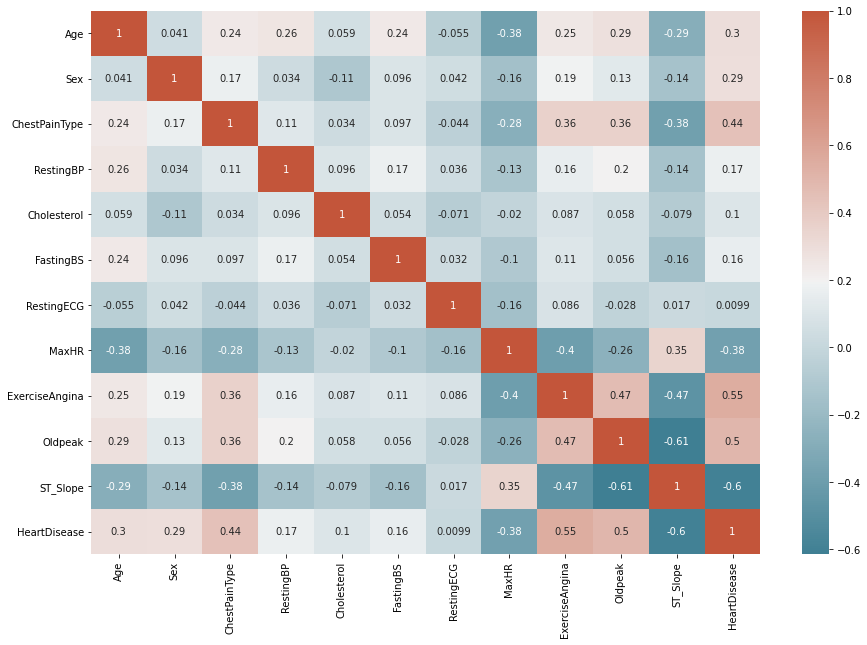

In [20]:
#Correlation Matrix- let’s you see correlations between all variables.
corr = clean_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.savefig("correlation_table.jpg", dpi = 100)

In [31]:
# Project only necessary columns and separate target feature for training data
projected_df = clean_df[['Age', 'Sex', 'Cholesterol', 'Oldpeak', 'ChestPainType', 'ExerciseAngina', 'HeartDisease']]
projected_df.head()

,Age,Sex,Cholesterol,Oldpeak,ChestPainType,ExerciseAngina,HeartDisease
0,40,1,289,0.0,0,0,0
1,49,0,180,1.0,1,0,1
2,37,1,283,0.0,0,0,0
3,48,0,214,1.5,2,1,1
4,54,1,195,0.0,1,0,0


## Machine learning -- Logistic Regression on Exercise Angina

In [63]:
# Project only necessary columns and separate target feature for training data
chestpain_df = clean_df[['ChestPainType', 'HeartDisease']]
chestpain_df.head(6)

,ChestPainType,HeartDisease
0,0,0
1,1,1
2,0,0
3,2,1
4,1,0
5,1,0


In [64]:
#Load dataset
# Split the dataframe into data and target["HeartDisease"]
y = chestpain_df['HeartDisease'].values
X = chestpain_df.drop('HeartDisease', axis=1)

In [65]:
# split our data into training and data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
# Encode the target column with 1s and 0s (both train and test)
X_test = X_test[X_train.columns]
target_encoder = LabelEncoder().fit(y_train)
y_train = target_encoder.transform(y_train)
y_test=target_encoder.transform(y_test)
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [67]:
# Check the shapes to make sure X_train and X_test have the same number of columns (same with y_train/y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 1)
(187, 1)
(559,)
(187,)


In [70]:
#this is for 1 column, exercise angina 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=25)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.7540106951871658
0.7441860465116279
